In [271]:
%matplotlib inline
import torch
import random
from torch import nn
from d2l import torch as d2l # I would like to use d2l just for data set
import matplotlib.pyplot as plt

### synthesis data

Presume ***y =  3x - 2y + 1***

Hence the *W* matricx may like $\mathbf{w} = [3, -2]^\top$, $\mathbf{b} = [1]$

In [272]:
def synthesis_data(w, b, n):
    #print(w.shape)
    #print(w.shape[0])
    #print(len(w))
    x = torch.normal(0, 1, (n, w.shape[0]))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape(-1, 1)

w_true = torch.tensor([3., -2.]) # must be float, otherwise the torch.matmul will fail
b_true = torch.tensor([1])
#print(w_true.shape)

features, labels = synthesis_data(w_true, b_true, 1000)

In [273]:
features.shape

torch.Size([1000, 2])

In [274]:
labels.shape

torch.Size([1000, 1])

In [275]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.1102, 0.3627]) 
label: tensor([0.6015])


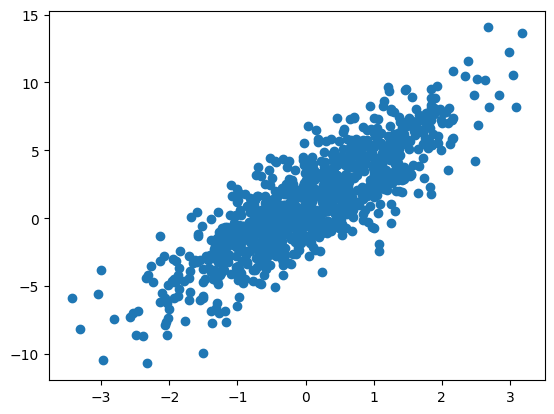

In [276]:
#plt.set_figsize()
# features[:,:1] means extra last column from matrix
plt.scatter(features[:,:1].detach().numpy(), labels.detach().numpy())

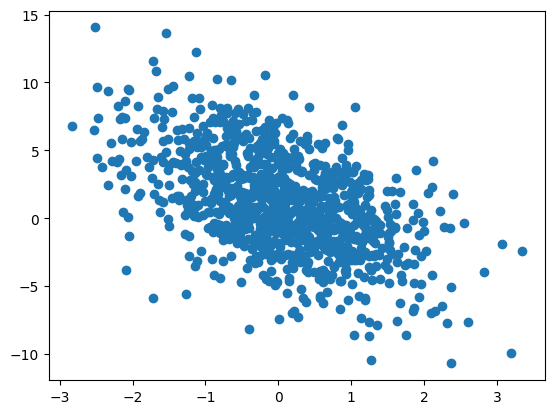

In [277]:
# features[:,:1] means extra first column from matrix
plt.scatter(features[:,1:].detach().numpy(), labels.detach().numpy())

### Define a data iterator function

In [278]:
def batch_iterator(batch_size, features, labels):
    cnt = len(features)
    indices = list(range(0, cnt))
    random.shuffle(indices)
    for i in range(0, cnt, batch_size):
        batch_indices = indices[i: min(i + batch_size, cnt)]
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for x, y in batch_iterator(batch_size, features, labels):
    print(x, '\n', y)
    break

tensor([[ 0.6164,  0.7821],
        [ 0.4343, -0.4361],
        [-0.0044,  0.5403],
        [ 2.0954,  1.8835],
        [-0.7679, -0.8136],
        [-0.3538, -0.3381],
        [ 0.2456,  0.1892],
        [-0.5774,  1.5112],
        [-1.8389, -1.0628],
        [ 1.7485,  0.2967]]) 
 tensor([[ 1.2757],
        [ 3.1599],
        [-0.0875],
        [ 3.5135],
        [ 0.3166],
        [ 0.6232],
        [ 1.3683],
        [-3.7503],
        [-2.4058],
        [ 5.6515]])


In [279]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### Define model

In [280]:
def linear_regression(x, w, b):
    #print('x.shape: ', x.shape)
    #print('w.shape: ', w.shape)
    #print('b.shape: ', b.shape)
    return torch.matmul(x, w) + b

### define loss

In [281]:
def square_loss(y, y_true):
    cur_loss = (y - y_true) ** 2
    return cur_loss

### stochastic gradient decrement 

In [282]:
def sgd(params, lr, batch_size):
    with torch.no_grad(): # it' indispensable, otherwise RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.
        for param in params:
            #print('param: ', param)
            #print('grad: ', param.grad)
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### train

In [284]:
lr = 0.03
num_epochs = 3
net = linear_regression
loss = square_loss

for epoch in range(num_epochs):
    for x, y in batch_iterator(batch_size, features, labels):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    train_ls = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_ls.mean()):f}')

epoch 1, loss 0.000106
epoch 2, loss 0.000109
epoch 3, loss 0.000106
